<a href="https://colab.research.google.com/github/GustavoGomesDias/ml/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [178]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [179]:
# qtd_linhas, qtd_coluna
train_df.shape

(1460, 81)

## Tratamento dos dado

### Removendo vazios

In [180]:
nan_percentage = (train_df.isnull().sum() / len(train_df)) * 100
empty_features = nan_percentage[nan_percentage >= 20].index
empty_features

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [181]:
nan_percentage = (train_df.isnull().sum() / len(train_df)) * 100
train_df.drop(nan_percentage[nan_percentage >= 20].index, axis=1, inplace=True)
train_df.shape

(1460, 75)

In [182]:
# nan_percentage_test = (test_df.isnull().sum() / len(test_df)) * 100
# test_df.drop(nan_percentage_test[nan_percentage_test > 50].index, axis=1, inplace=True)
# test_df.shape

In [183]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Removendo duplicados

In [184]:
train_df.drop_duplicates(inplace=True)
train_df.shape

(1460, 75)

In [185]:
# test_df.drop_duplicates(inplace=True)
# test_df.shape

### Removendo outiliers



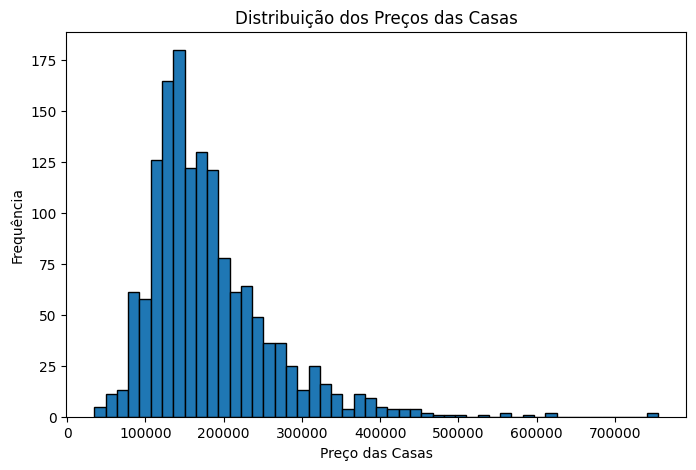

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(train_df['SalePrice'], bins=50, edgecolor="black")
plt.xlabel("Preço das Casas")
plt.ylabel("Frequência")
plt.title("Distribuição dos Preços das Casas")
plt.show()


#### Método IQR

Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
limite_inf: 3937.5
limite_sup: 340037.5
Len outliers: 61


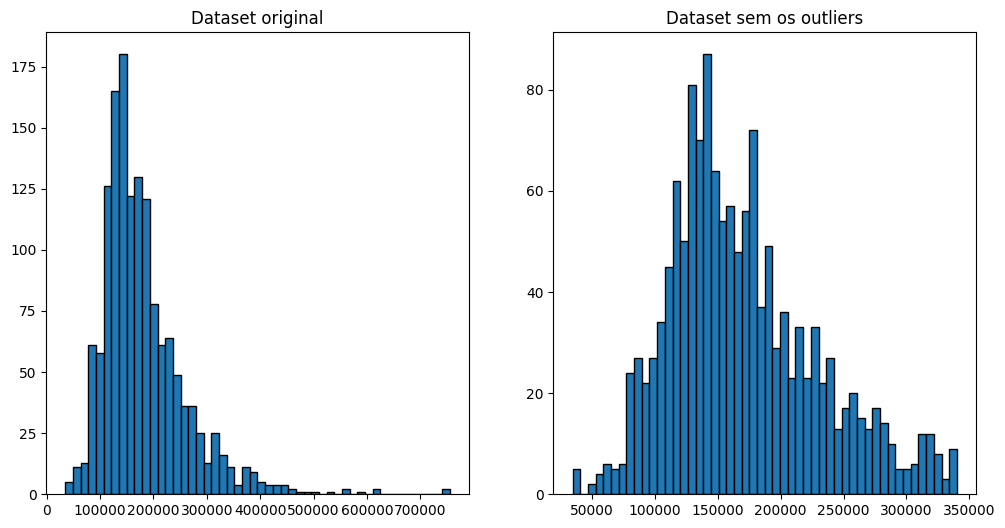

In [187]:
def remover_outliers(X):
    Q1 = X['SalePrice'].quantile(0.25)
    Q3 = X['SalePrice'].quantile(0.75)

    IQR = Q3 - Q1

    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    outliers = X[(X['SalePrice'] < limite_inf) | (X['SalePrice'] > limite_sup)]

    X_sem_outliers = X[(X['SalePrice'] >= limite_inf) & (X['SalePrice'] <= limite_sup)]

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"limite_inf: {limite_inf}")
    print(f"limite_sup: {limite_sup}")
    print(f"Len outliers: {len(outliers)}")

    # Gerando o gráfico
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(X['SalePrice'], bins=50, edgecolor="black")
    plt.title("Dataset original")

    plt.subplot(1, 2, 2)
    plt.hist(X_sem_outliers['SalePrice'], bins=50, edgecolor="black")
    plt.title("Dataset sem os outliers")

    plt.show()

    return X_sem_outliers

train_df_sem_outliers = remover_outliers(train_df)

In [188]:
y_train = train_df_sem_outliers['SalePrice']
x_train = train_df_sem_outliers.drop(['SalePrice'], axis=1)
x_train.set_index('Id', inplace=True)

x_train.shape, y_train.shape

((1399, 73), (1399,))

## Pré-processamento dos dados

In [189]:
def select_columns(X, type):
    return X[x_train.select_dtypes(include=type).columns]

### Dados numéricos

In [190]:
pipenum = Pipeline([
    ('selector', FunctionTransformer(select_columns, kw_args={'type': 'number'})),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
x_num_tratado = pipenum.fit_transform(x_train)
x_num_tratado

array([[ 0.05871953, -0.1796042 , -0.20491588, ..., -0.08959414,
        -1.59562553,  0.13571186],
       [-0.87611541,  0.51745409, -0.06672559, ..., -0.08959414,
        -0.48559066, -0.61770437],
       [ 0.05871953, -0.04019254,  0.13154743, ..., -0.08959414,
         0.99445583,  0.13571186],
       ...,
       [ 0.29242826, -0.13313365, -0.13377792, ...,  4.84560466,
        -0.48559066,  1.6425443 ],
       [-0.87611541, -0.04019254, -0.05266623, ..., -0.08959414,
        -0.85560229,  1.6425443 ],
       [-0.87611541,  0.28510133, -0.02622983, ..., -0.08959414,
        -0.11557904,  0.13571186]])

### Dados categóricos

In [191]:
pipecat = Pipeline([
    ('selector', FunctionTransformer(select_columns, kw_args={'type': 'object'})),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # normaliza os dados categoricos em binários - pode aumentar o tempo de processamento, pois algumas caracteristicas tem muitas opções
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

x_cat_tratado = pipecat.fit_transform(x_train)

In [192]:
pipeunion = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
])

train_df_tratado = pipeunion.fit_transform(x_train)

## Modelo de regressão

### Linear Regression

In [193]:
pipe_linear_reg = Pipeline([
    ('preproc', pipeunion),
    ('regression', LinearRegression())
])

pipe_linear_reg.fit(x_train, y_train)

Pipeline(steps=[('preproc',
                 FeatureUnion(transformer_list=[('pipenum',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function select_columns at 0x7c17a65665c0>,
                                                                                      kw_args={'type': 'number'})),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('pipecat',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function select_columns at 0x7c17a65665c0>,
                                                                                      kw_args={'type': 'object'})),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('encoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('regression', LinearRegression())])

In [194]:
y_pred = pipe_linear_reg.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae, rmse

(10557.136661129929, 14692.083974376696)

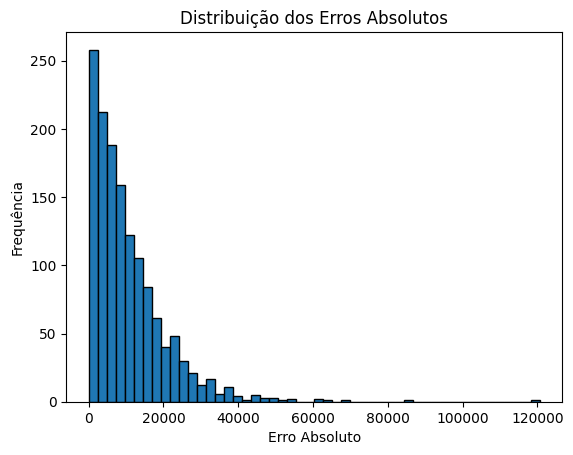

In [195]:
erros = y_train - y_pred
erro_absoluto = abs(erros)
plt.hist(erro_absoluto, bins=50, edgecolor='black')
plt.title("Distribuição dos Erros Absolutos")
plt.xlabel("Erro Absoluto")
plt.ylabel("Frequência")
plt.show()

In [196]:
test_df.set_index('Id', inplace=True)

y_pred = pipe_linear_reg.predict(test_df)
y_pred

array([115250.96351873, 168573.54173049, 187675.12984915, ...,
       176868.43692242, 112291.3237166 , 217023.92000684])

In [197]:
submission_df = pd.DataFrame({'Id': test_df.index, 'SalePrice': y_pred})
submission_df.to_csv('submission_lr.csv', index=False)

### Random Forest Regression

In [198]:
pipe_rf_reg = Pipeline([
    ('preproc', pipeunion),
    ('regression', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipe_rf_reg.fit(x_train, y_train)

Pipeline(steps=[('preproc',
                 FeatureUnion(transformer_list=[('pipenum',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function select_columns at 0x7c17a65665c0>,
                                                                                      kw_args={'type': 'number'})),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('pipecat',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function select_columns at 0x7c17a65665c0>,
                                                                                      kw_args={'type': 'object'})),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('encoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('regression', RandomForestRegressor(random_state=42))])

In [199]:
y_pred = pipe_rf_reg.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae, rmse

(5628.21729807005, 8037.089585060595)

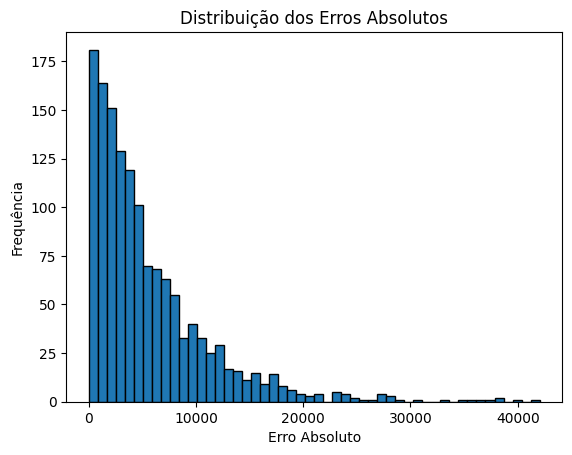

In [200]:
erros = y_train - y_pred
erro_absoluto = abs(erros)
plt.hist(erro_absoluto, bins=50, edgecolor='black')
plt.title("Distribuição dos Erros Absolutos")
plt.xlabel("Erro Absoluto")
plt.ylabel("Frequência")
plt.show()

In [201]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [202]:
y_pred = pipe_rf_reg.predict(test_df)
y_pred

array([126904.16, 155976.5 , 181892.09, ..., 152209.66, 117005.33,
       226982.38])

In [203]:
# prompt: Cria um csv com Id,SalePrice. O Id vai vir de test_df (primeira coluna) e o SalePrice é o y_pred

submission_df = pd.DataFrame({'Id': test_df.index, 'SalePrice': y_pred})
submission_df.to_csv('submission_rfr.csv', index=False)

### MLPRegressor

In [204]:
pipe_mlp_reg = Pipeline([
    ('preproc', pipeunion),
    ('regression', MLPRegressor(max_iter=1000, random_state=42))
])

pipe_mlp_reg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preproc',
                 FeatureUnion(transformer_list=[('pipenum',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function select_columns at 0x7c17a65665c0>,
                                                                                      kw_args={'type': 'number'})),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('pipecat',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function select_columns at 0x7c17a65665c0>,
                                                                                      kw_args={'type': 'object'})),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('encoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('regression', MLPRegressor(max_iter=1000, random_state=42))])

In [205]:
y_pred = pipe_mlp_reg.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae, rmse

(29883.007624587528, 40251.0138763325)

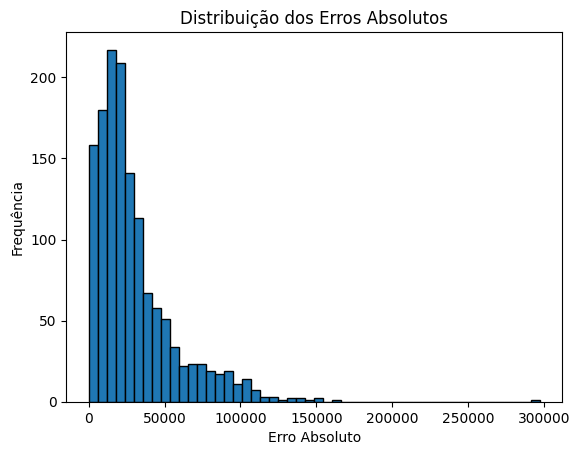

In [206]:
erros = y_train - y_pred
erro_absoluto = abs(erros)
plt.hist(erro_absoluto, bins=50, edgecolor='black')
plt.title("Distribuição dos Erros Absolutos")
plt.xlabel("Erro Absoluto")
plt.ylabel("Frequência")
plt.show()

### KNN

In [207]:
pipe_1nn_reg = Pipeline([
    ('preproc', pipeunion),
    ('knn', KNeighborsRegressor(n_neighbors=1))
])

pipe_1nn_reg.fit(x_train, y_train)

y_pred = pipe_1nn_reg.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae, rmse

(0.0, 0.0)

### Cross validation

In [208]:
scores = cross_val_score(pipe_1nn_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores

array([-7.37916984e+08, -1.12112330e+09, -1.13094362e+09, -1.14289136e+09,
       -8.76777452e+08, -6.90973311e+08, -7.62763598e+08, -8.90570732e+08,
       -8.14984512e+08, -8.25476116e+08])

In [209]:
scores = cross_val_score(pipe_mlp_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

array([-1.40162308e+09, -2.31641420e+09, -1.85752656e+09, -2.20696215e+09,
       -1.85200537e+09, -1.32059289e+09, -1.67964341e+09, -1.63334619e+09,
       -2.53680719e+09, -1.63409900e+09])

In [210]:
scores = cross_val_score(pipe_rf_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores

array([-5.11334618e+08, -5.45920031e+08, -4.20660858e+08, -4.44238311e+08,
       -5.53618603e+08, -2.51179638e+08, -3.52956562e+08, -3.87317193e+08,
       -4.79246273e+08, -6.16846733e+08])